# Capacitação Vialab # Atividade 10

## Aprender sobre a GAN
### Data de atualização: 08/02/2022

# Objetivo: Aprender conceitos e aplicações básicas da GAN e seus resultados 

# **Generative Adversarial Networks**


As redes adversariais generativas (GANs) são arquiteturas algorítmicas que utilizam duas redes neurais, colocando uma contra a outra (portanto o "adversário") a fim de gerar novas instâncias sintéticas de dados que podem se passar por dados reais. Elas são amplamente utilizadas na geração de imagens, geração de vídeo e geração de voz.

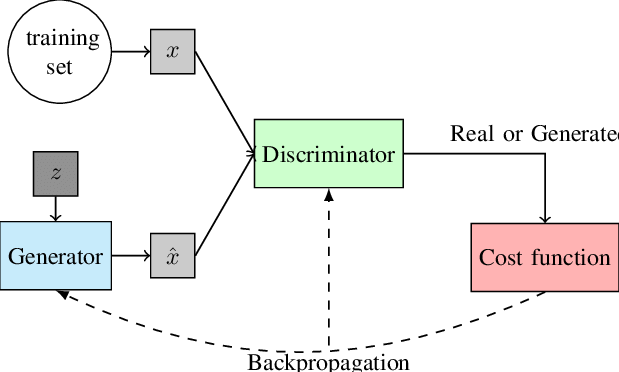

Enquanto a maioria dos modelos generativos profundos são treinados maximizando a probabilidade de log ou um limite inferior na probabilidade de log, as GANs adotam uma abordagem radicalmente diferente que não requer inferência ou cálculo explícito da probabilidade de dados. Em vez disso, dois modelos são usados para resolver um jogo minimax: um gerador que gera os dados e um discriminador que classifica os dados como reais ou gerados. Em teoria, esses modelos são capazes de modelar uma distribuição de probabilidade arbitrariamente complexa.

# **Objetivo**

O objetivo deste caderno é apresentar aos iniciantes o conceito de Generative Adversarial Networks (GANs) da maneira mais intuitiva possível. O objetivo é descrever o funcionamento dessa rede sem se aprofundar na matemática complexa associada e de uma forma mais prática para que o espectador possa desenvolver sua própria GAN simples.

Um GAN simples é construído primeiro aqui com apenas camadas densas ocultas e tenta produzir imagens significativas. A saída é analisada descobrindo um problema específico que é comum em GANs simples. O problema é resolvido na próxima parte com um tipo específico de GAN chamado Deep Convolution Generative Adversarial Networks (DCGANs).

# **Introdução**


As GANs são compostas de dois componentes:

1. **Gerador - gera novas instâncias de dados**

2. **Discriminador - tenta distinguir os dados gerados (ou falsos) do conjunto de dados real.**

Algoritmos discriminativos tentam classificar os dados de entrada; ou seja, dadas as características de uma instância de dados, eles preveem um rótulo ou categoria à qual esses dados pertencem. Portanto, algoritmos discriminativos mapeiam recursos para rótulos. Eles estão preocupados apenas com essa correlação. Por outro lado, os algoritmos generativos fazem o oposto. Em vez de prever um rótulo com base em determinados recursos, eles tentam prever os recursos com um determinado rótulo.

Durante o treinamento, ambos começam juntos do zero e o gerador aprende a moldar a distribuição aleatória através das épocas de treinamento.

# **Princípio de funcionamento**

A rede **generativa** é alimentada com ruído (que pode estar na forma de uma distribuição aleatória) e gera dados falsos a partir do ruído. Os dados falsos do gerador são inseridos no discriminador. Uma vez que o treinamento esteja completo, o gerador deve ser capaz de gerar dados reais a partir dos ruídos.

O fato interessante aqui é que o gerador aprende a produzir imagens significativas sem sequer olhar para a imagem.

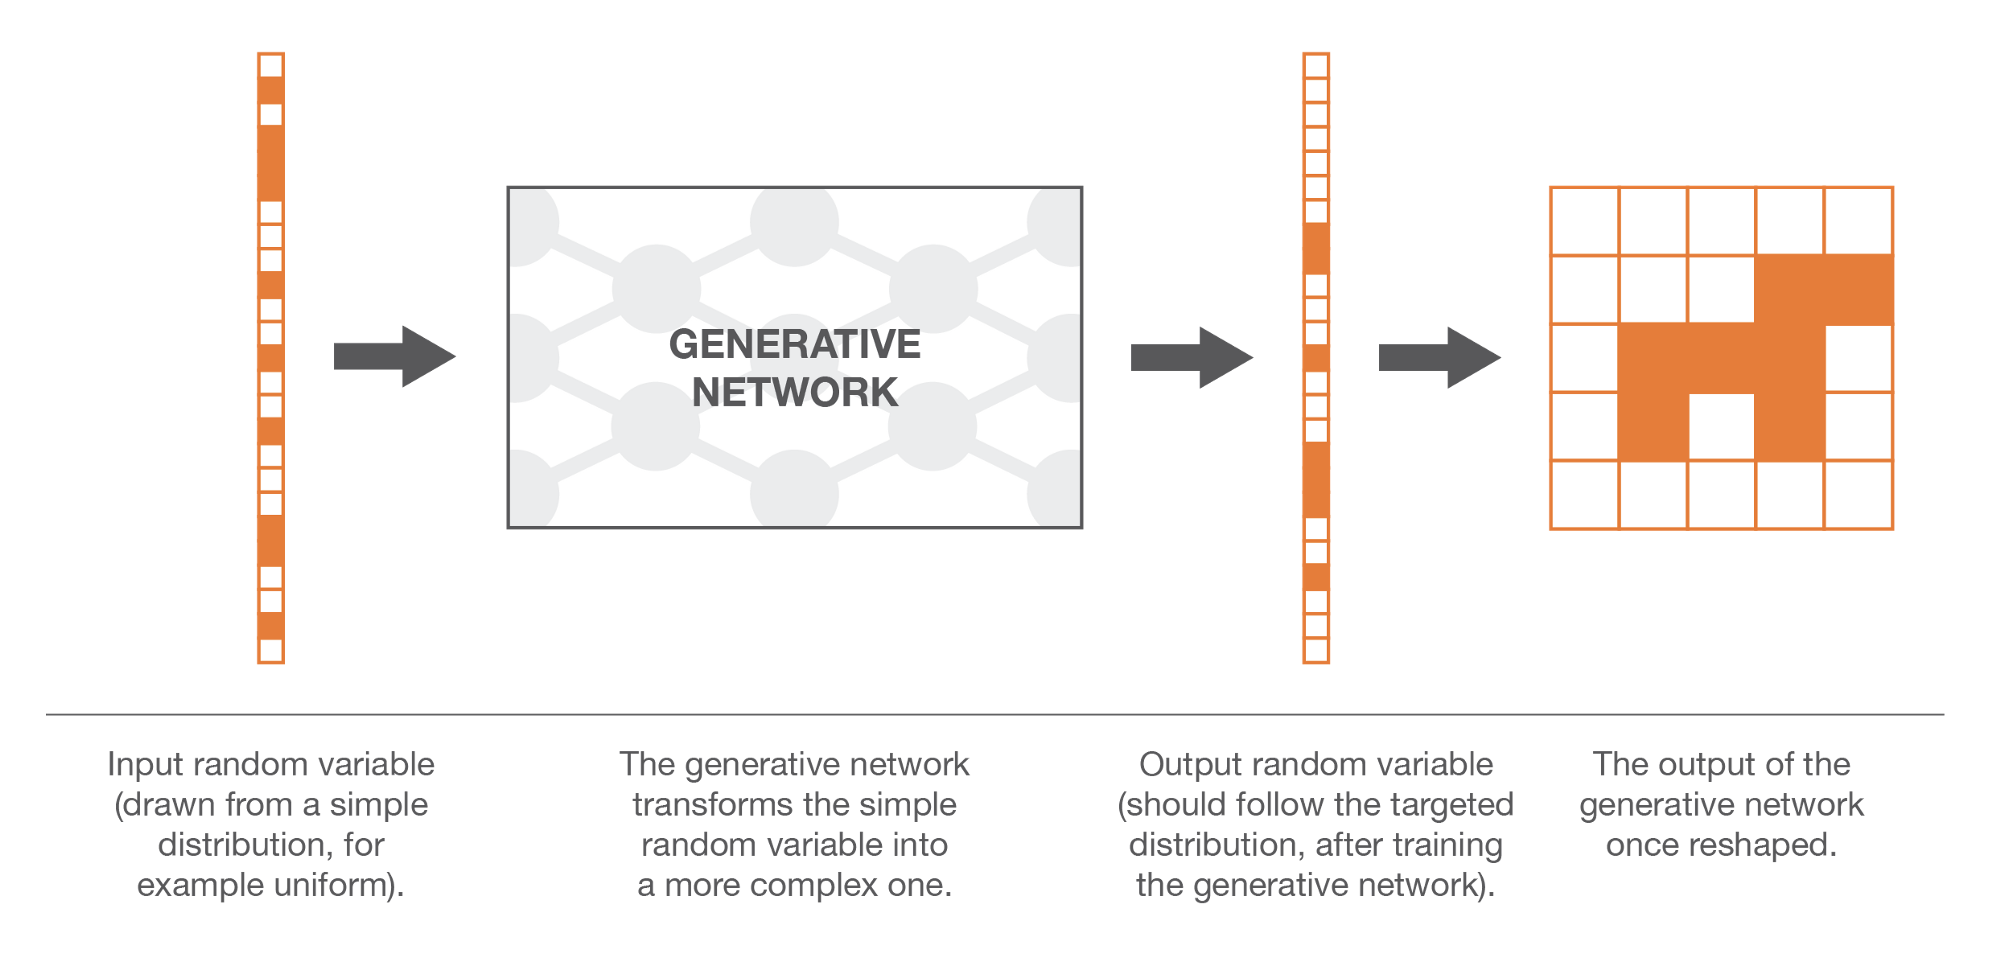

O **Discriminador** ou a rede adversária funciona como oponente do gerador. É basicamente um classificador ou discriminador cuja função é distinguir entre duas classes diferentes de dados. Aqui as classes são dados reais (rotulados como 1) e os dados falsos que o gerador produz (rotulado como 0).



# **Treinando a rede**

O importante sobre o treinamento de uma GAN é que os dois componentes nunca devem ser treinados juntos. Em vez disso, a rede é treinada em duas fases diferentes, a primeira fase é para treinar o discriminador e atualizar os pesos adequadamente e na próxima etapa o gerador é treinado enquanto o treinamento do discriminador está desabilitado.

**Fase 1**
Durante a primeira fase de treinamento, o gerador é alimentado com dados aleatórios (na forma de uma distribuição) como ruído. O gerador cria algumas imagens aleatórias que são dadas ao discriminador. O discriminador também recebe entrada do conjunto de dados de imagens reais.
O discriminador aprende a distinguir os dados reais dos falsos aprendendo ou avaliando recursos de suas entradas. O discriminador gera alguma probabilidade e diferença entre os resultados (previstos e reais), estes são retropropagados através da rede e os pesos do discriminador são atualizados.

Lembre-se: durante esta fase, a retropropagação para no final do discriminador e o gerador não é treinado ou atualizado.


**Fase 2**
Nesta fase, o lote de imagens produzido pelo gerador é fornecido diretamente como entrada para o discriminador. As imagens reais não são dadas desta vez ao discriminador. O gerador aprende enganando o discriminador para que ele produza falsos positivos. O discriminador gera probabilidades que são avaliadas em relação aos resultados reais e os pesos do gerador são atualizados por retropropagação.
Lembre-se aqui durante a retropropagação, os pesos do discriminador não devem ser atualizados e mantidos como eram antes.

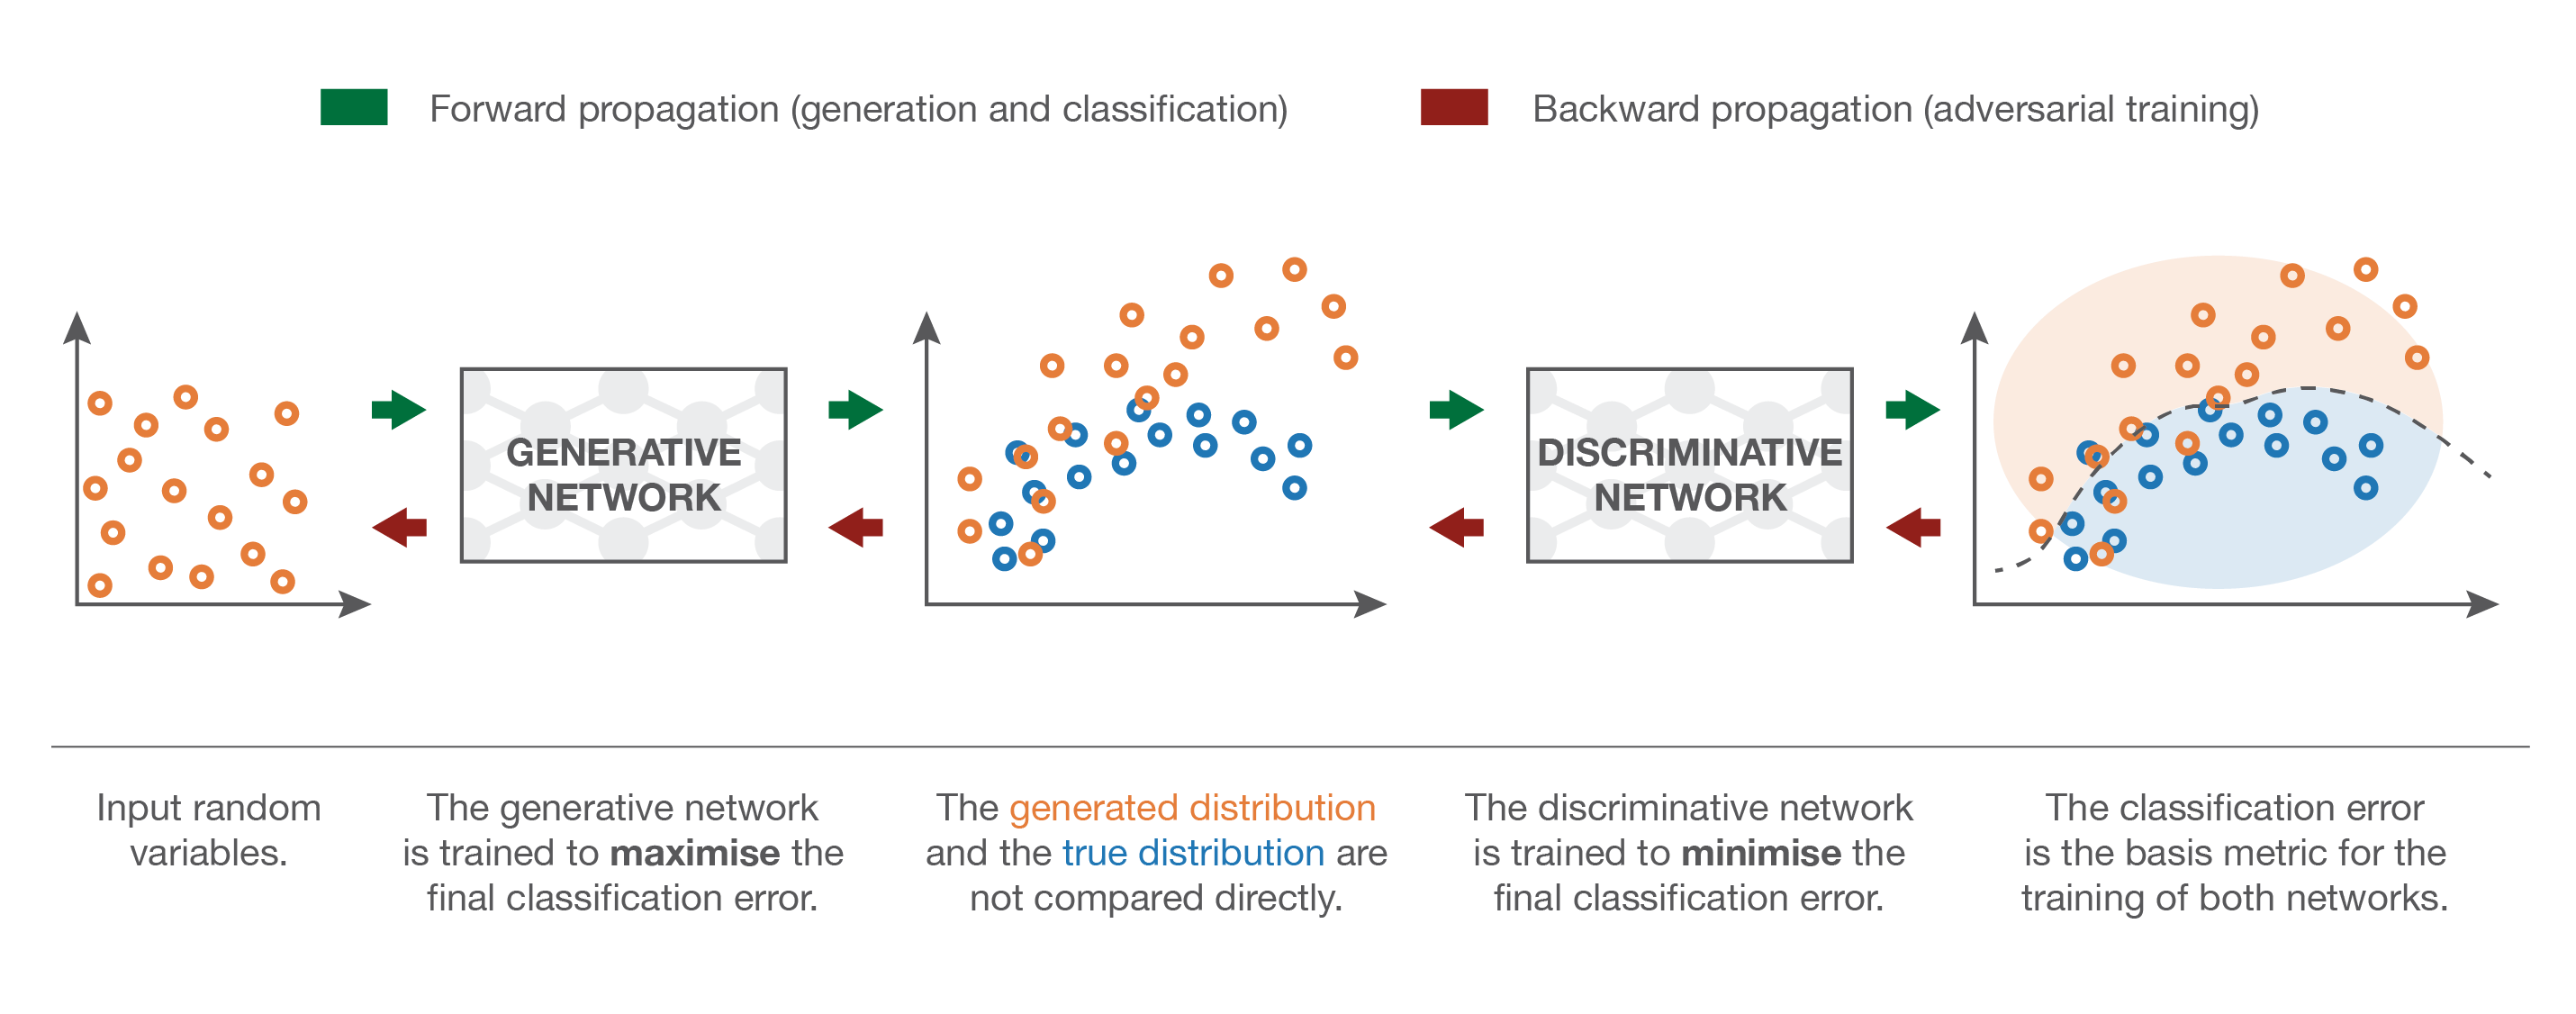

**LOSS FUNCTION de uma GAN simples**

No documento que introduziu os GANs (link abaixo na referência), o gerador tenta minimizar a seguinte função enquanto o discriminador tenta maximizá-la:

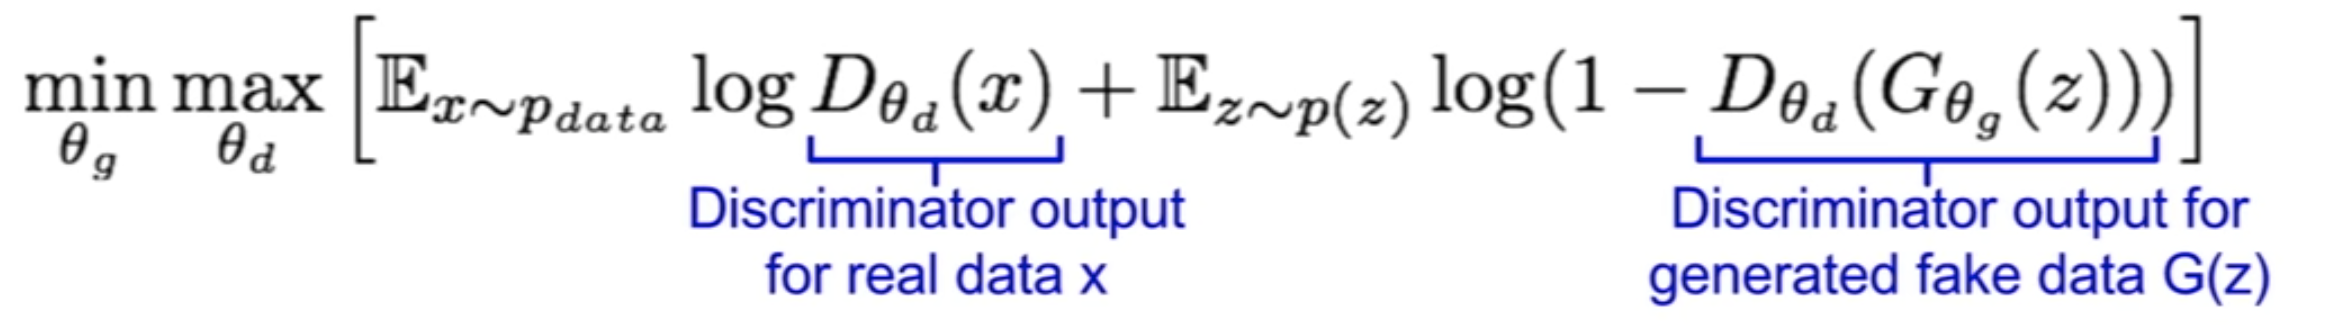

Nesta função:

* D(x) é a estimativa do discriminador da probabilidade de que a instância x dos dados reais seja real.
* Ex é o valor esperado sobre todas as instâncias de dados reais.
* G(z) é a saída do gerador quando dado o ruído z.
* D(G(z)) é a estimativa do discriminador sobre a probabilidade de que uma instância falsa seja real.
* Ez é o valor esperado sobre todas as entradas aleatórias do gerador (na verdade, o valor esperado sobre todas as instâncias falsas geradas G(z)).

O gerador não pode afetar diretamente o termo log(D(x)) na função, portanto, para o gerador, minimizar a perda é equivalente a minimizar o log(1 - D(G(z))).

**Aplicações de GANs**

* Gerar exemplos para conjuntos de dados de imagens
* Gerar Fotografias de Faces Humanas
* Gerar Fotografias Realistas
* Tradução de Imagem para Imagem
* Tradução de texto para imagem
* Tradução Semântica-Imagem-para-Foto
* Fotos para Emojis
* Envelhecimento facial
* Super Resolução
* Geração de objetos 3D


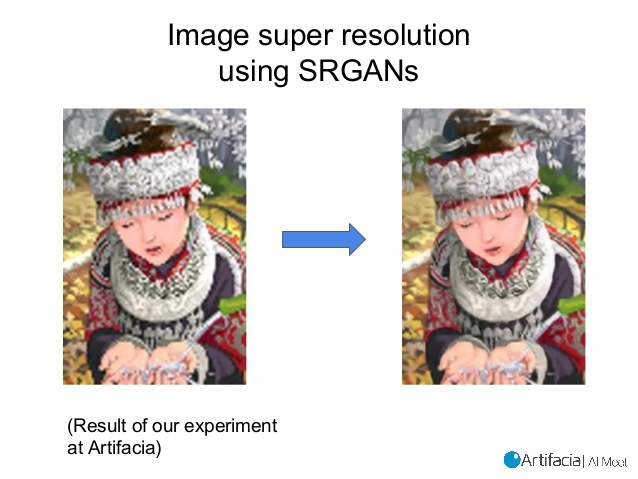

# **Problemas com GANs simples**

Na prática, porém, os GANs sofrem de muitos problemas, particularmente durante o treinamento. Um problema comum envolve o colapso do gerador para produzir apenas uma única amostra ou uma pequena família de amostras muito semelhantes. Neste caso, o gerador aprende a enganar o discriminador com uma única imagem ou algumas imagens para acreditar como imagem real. Outra envolve o gerador e o discriminador oscilando durante o treinamento, em vez de convergir para um ponto fixo. Além disso, se um agente se torna muito mais poderoso que o outro, o sinal de aprendizagem para o outro agente se torna inútil, e o sistema não aprende.

Para treinar GANs, muitos truques devem ser empregados, um desses métodos é o uso de Redes Generativas Adversariais de Convolução Profunda como discutido em um artigo de pesquisa publicado em 2016 (link nas referências).

# **Vamos iniciar**

In [ ]:
# falar sobre o ambiente conda e como carregar ele
# aqui estao varios pacotes uteis para carregar

import numpy as np # algebra linear

**Importing useful packages**

In [ ]:
import matplotlib.pyplot as plt # plotar dados em gráficos
from keras.datasets import fashion_mnist # dataset que usaremos
from keras.models import Sequential # formato que iremos construir as nossas redes
from keras.layers import Conv2D, Dropout, Dense, Flatten, Conv2DTranspose, BatchNormalization, LeakyReLU, Reshape # camadas
import tensorflow as tf

# **Carregando e preprocessando os dados**

In [ ]:
(X_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
del y_train, x_test, y_test

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
print(X_train.shape)

(60000, 28, 28, 1)


# **Visualização dos dados**

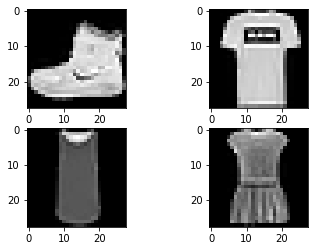

In [ ]:
fig, axe = plt.subplots(2,2)
idx = 0
for i in range(2):
    for j in range(2):
        axe[i,j].imshow(X_train[idx].reshape(28, 28), cmap='gray')
        idx += 1

In [ ]:
X_train = X_train.astype('float32')

Os dados de pixels variam de 0 a 255, portanto dividindo cada pixel por 255, ou seja, normalizando os dados de forma que o intervalo esteja entre 0 e 1.

In [ ]:
X_train = X_train / 255
X_train = X_train*2 - 1.

**NOTA** Depois de normalizado é multiplicado por 2 e subtraído de 1 de tal forma que varia de (-1,1) porque nos DCGANs a última camada de ativação do modelo generativo é tanh que o intervalo é (-1,1) diferente do sigmóide (0,1).

In [ ]:
print(X_train.max(), X_train.min())

1.0 -1.0


# **Modelo de GAN Simples**

**Parte do Gerador**

In [ ]:
generator = Sequential()
generator.add(Dense(512, input_shape=[100]))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(128))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(784))
generator.add(Reshape([28,28,1]))

In [ ]:
generator.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               51712     
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization_99 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_100 (Ba  (None, 256)              1024      
 tchNormalization)                                    

**Parte do Discriminador**

In [ ]:
discriminator = Sequential()
discriminator.add(Dense(1, input_shape=[28,28,1]))
discriminator.add(Flatten())
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(128))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(64))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1, activation='sigmoid'))

In [ ]:
discriminator.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 28, 28, 1)         2         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 128)              

1. Compilação da camada discriminadora
2. Compilação do GAN 

NOTA: a camada geradora não é compilada separadamente porque é treinada como parte do modelo combinado, mas o treinamento do discriminador é necessário porque é treinado antes do modelo combinado.

In [ ]:
GAN = Sequential([generator, discriminator])
discriminator.compile(optimizer='adam', loss='binary_crossentropy')
discriminator.trainable = False

In [ ]:
GAN.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
GAN.layers

In [ ]:
GAN.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 28, 28, 1)         320656    
                                                                 
 sequential_7 (Sequential)   (None, 1)                 242179    
                                                                 
Total params: 562,835
Trainable params: 318,864
Non-trainable params: 243,971
_________________________________________________________________


# Avaliação dos resultados
### **Introdução**
Para os GANs, não há função de perda objetiva usada para treinar os modelos geradores de GAN e não há como avaliar objetivamente o progresso do treinamento e a qualidade relativa ou absoluta do modelo apenas com base na perda.

Em vez disso, foi desenvolvido um conjunto de técnicas qualitativas e quantitativas para avaliar o desempenho de um modelo GAN com base na qualidade e diversidade das imagens sintéticas geradas.

The objective evaluation of GAN generator models remains an open problem.

> While several measures have been introduced, as of yet, there is no consensus as to which measure best captures strengths and limitations of models and should be used for fair model comparison.

<cite>Pros and Cons of GAN Evaluation Measures, 2018.</cite>

### **Avaliação manual**

Muitos praticantes de GAN voltam à avaliação dos geradores GAN através da avaliação manual/visual de imagens sintetizadas por um modelo de gerador.

Isto envolve o uso do modelo gerador para criar um lote de imagens sintéticas, avaliando então a qualidade e diversidade das imagens em relação ao domínio alvo.

Embora a inspeção manual seja o método mais simples de avaliação de modelos, ela tem muitas limitações, inclusive:

- Ela é subjetiva, incluindo os enviesamentos do revisor sobre o modelo, sua configuração, e o objetivo do projeto.
- Ela requer conhecimento do que é realista e do que não é para o domínio alvo.
- É limitado ao número de imagens que podem ser revisadas em um tempo razoável.

### **Avaliação quantitativa**
A avaliação quantitativa do gerador de GAN refere-se ao cálculo das pontuações numéricas específicas utilizadas para resumir a qualidade das imagens geradas.

Duas métricas amplamente adotadas para avaliar as imagens geradas são a Inception Score e a Frechet Inception Distance.

O cálculo da Inception Score envolve o uso de um modelo de rede neural de aprendizado profundo pré-treinado para a classificação das imagens geradas. Especificamente, o modelo Inception v3 descrito por Christian Szegedy, et al. em seu documento de 2015 intitulado "Rethinking the Inception Architecture for Computer Vision" (Repensando a Arquitetura Inicial para a Visão do Computador). A confiança no modelo Inception dá ao Inception Score seu nome. Uma pontuação de Inception Score mais alta indica imagens geradas com melhor qualidade.

A pontuação Frechet Inception Distance, ou FID, foi proposta e usada por Martin Heusel, et al. em seu documento de 2017 intitulado "GANs Trained by a Two Time-Scale Update Rule Converge to a Local Nash Equilibrium". A pontuação foi proposta como uma melhoria em relação à Inception Score existente. Uma pontuação mais baixa do FID indica imagens mais realistas que correspondem às propriedades estatísticas das imagens reais.

O texto acima foi extraído e adaptado da página [How to Evaluate Generative Adversarial Networks](https://machinelearningmastery.com/how-to-evaluate-generative-adversarial-networks/).


## **Implementação da FID**
Código extraído de [How to Implement the Frechet Inception Distance (FID) for Evaluating GANs](https://machinelearningmastery.com/how-to-implement-the-frechet-inception-distance-fid-from-scratch/)

In [ ]:
# example of calculating the frechet inception distance in Keras for cifar10
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
from keras.datasets import cifar10

# scale an array of images to a new size
def scale_images(images, new_shape):
    images_list = list()
    for image in images:
        # resize with nearest neighbor interpolation
        new_image = resize(image, new_shape, 0)
        # store
        images_list.append(new_image)
    return asarray(images_list)

# calculate frechet inception distance
def calculate_fid(model, images1, images2):
    # convert integer to floating point values
    images1 = images1.astype('float32')
    images2 = images2.astype('float32')
    # resize images
    images1 = scale_images(images1, (299,299,3))
    images2 = scale_images(images2, (299,299,3))
    print('Scaled', images1.shape, images2.shape)
    # pre-process images
    images1 = preprocess_input(images1)
    images2 = preprocess_input(images2)

    # calculate activations
    act1 = model.predict(images1)
    act2 = model.predict(images2)
    # calculate mean and covariance statistics
    mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
    # calculate sum squared difference between means
    ssdiff = numpy.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if iscomplexobj(covmean):
        covmean = covmean.real
    # calculate score
    fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

# prepare the inception v3 model
inception = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))

# **Treinamento**

In [ ]:
epochs = 30
epochs = 100
batch_size = 100
noise_shape = 100
device = '/gpu:0' if tf.test.is_built_with_cuda() else '/cpu'

Atualmente na epoca: 1


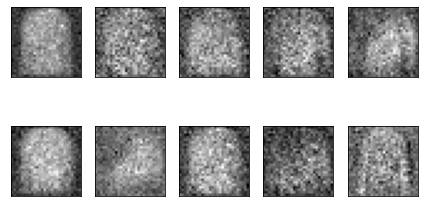

Atualmente na epoca: 2
Atualmente na epoca: 3


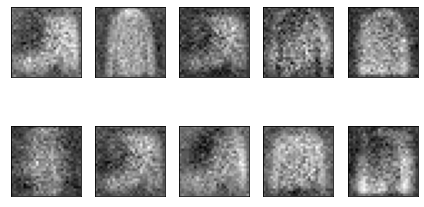

Atualmente na epoca: 4
Atualmente na epoca: 5


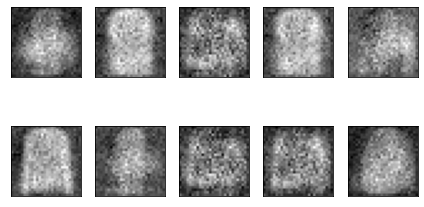

Atualmente na epoca: 6
Atualmente na epoca: 7


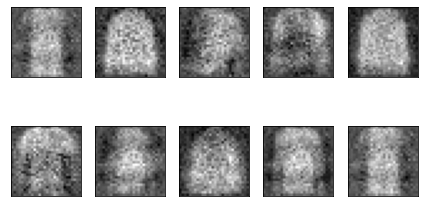

Atualmente na epoca: 8
Atualmente na epoca: 9


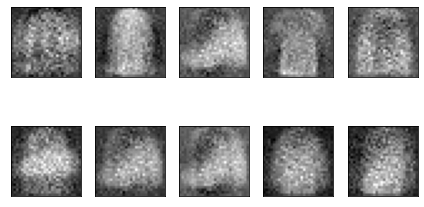

Atualmente na epoca: 10
Atualmente na epoca: 11


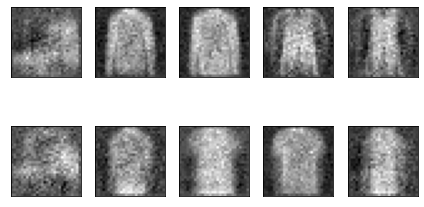

Atualmente na epoca: 12
Atualmente na epoca: 13


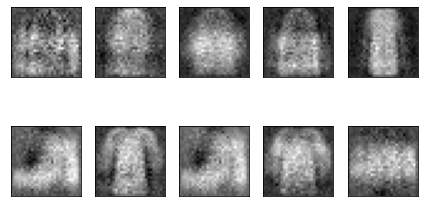

Atualmente na epoca: 14
Atualmente na epoca: 15


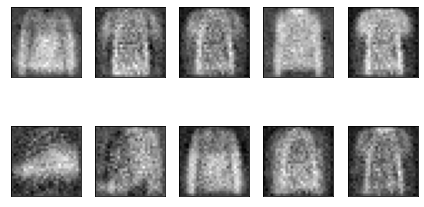

Atualmente na epoca: 16
Atualmente na epoca: 17


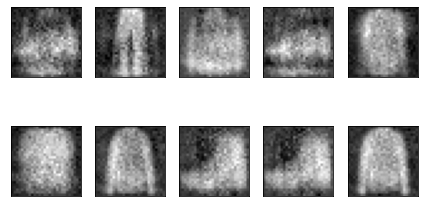

Atualmente na epoca: 18
Atualmente na epoca: 19


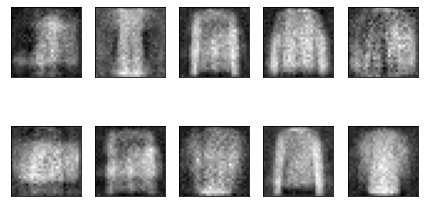

Atualmente na epoca: 20
Atualmente na epoca: 21


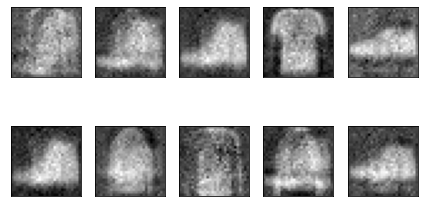

Atualmente na epoca: 22
Atualmente na epoca: 23


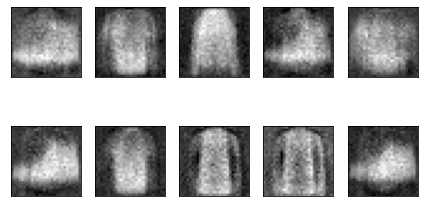

Atualmente na epoca: 24
Atualmente na epoca: 25


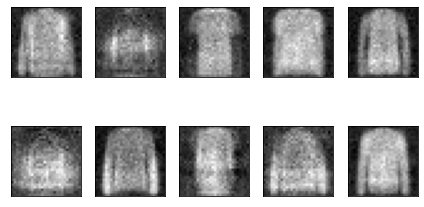

Atualmente na epoca: 26
Atualmente na epoca: 27


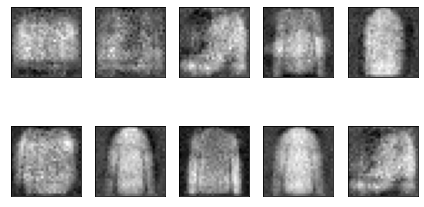

Atualmente na epoca: 28
Atualmente na epoca: 29


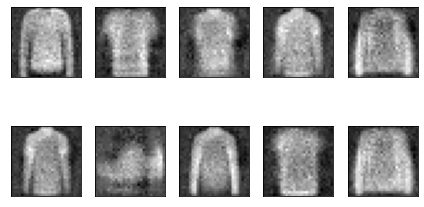

Atualmente na epoca: 30
Atualmente na epoca: 31


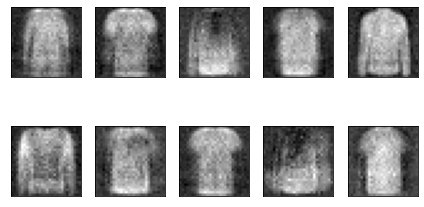

Atualmente na epoca: 32
Atualmente na epoca: 33


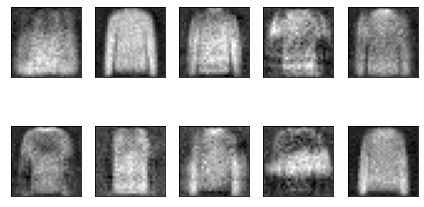

Atualmente na epoca: 34
Atualmente na epoca: 35


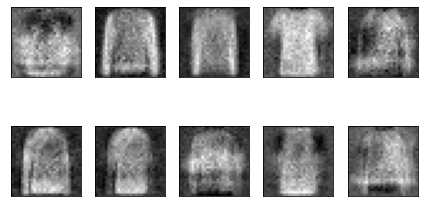

Atualmente na epoca: 36
Atualmente na epoca: 37


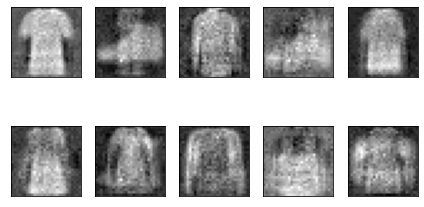

Atualmente na epoca: 38
Atualmente na epoca: 39


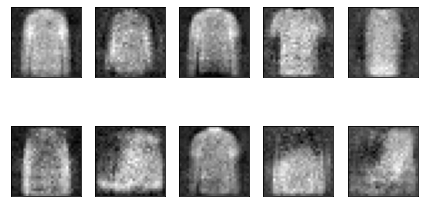

Atualmente na epoca: 40
Atualmente na epoca: 41


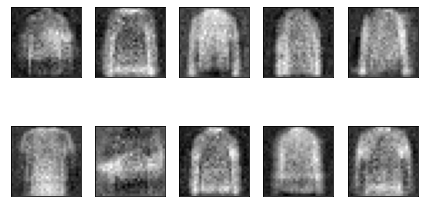

Atualmente na epoca: 42
Atualmente na epoca: 43


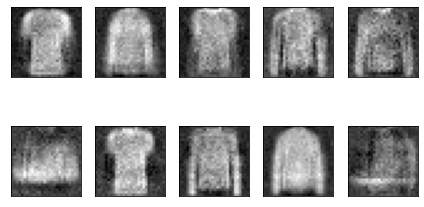

Atualmente na epoca: 44
Atualmente na epoca: 45


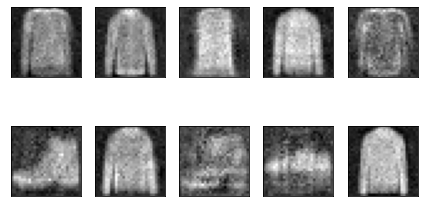

Atualmente na epoca: 46
Atualmente na epoca: 47


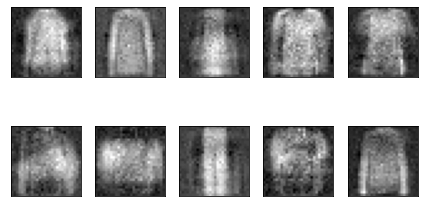

Atualmente na epoca: 48
Atualmente na epoca: 49


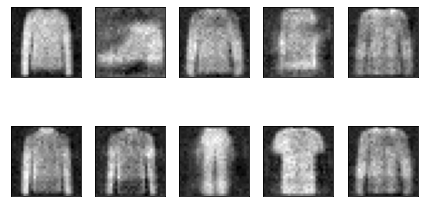

Atualmente na epoca: 50
Atualmente na epoca: 51


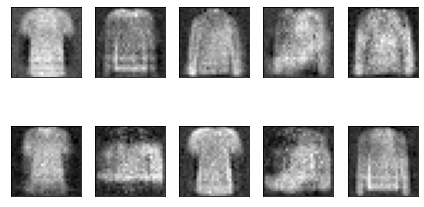

Atualmente na epoca: 52
Atualmente na epoca: 53


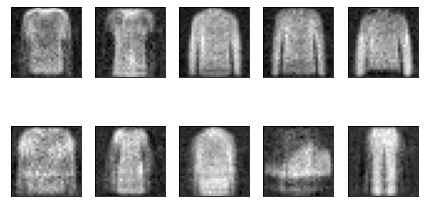

Atualmente na epoca: 54
Atualmente na epoca: 55


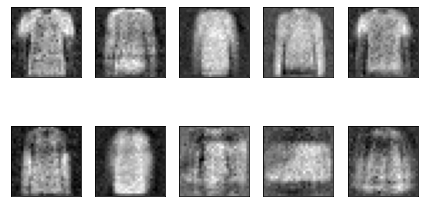

Atualmente na epoca: 56
Atualmente na epoca: 57


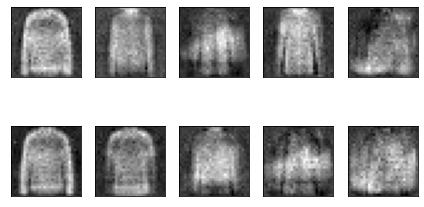

Atualmente na epoca: 58
Atualmente na epoca: 59


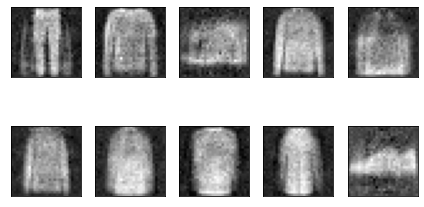

Atualmente na epoca: 60
Atualmente na epoca: 61


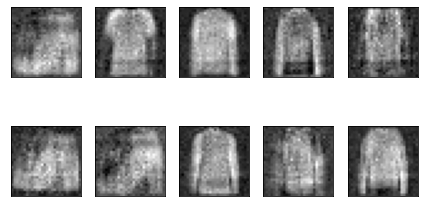

Atualmente na epoca: 62
Atualmente na epoca: 63


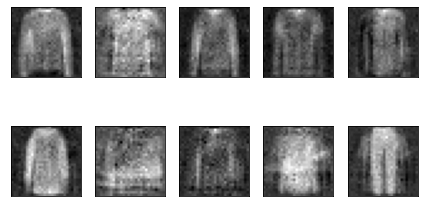

Atualmente na epoca: 64
Atualmente na epoca: 65


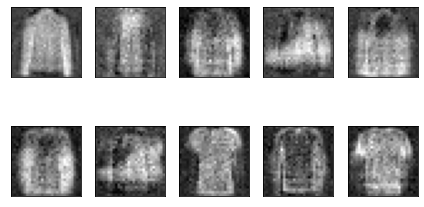

Atualmente na epoca: 66
Atualmente na epoca: 67


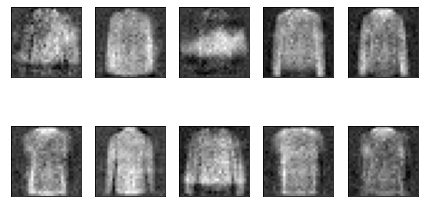

Atualmente na epoca: 68
Atualmente na epoca: 69


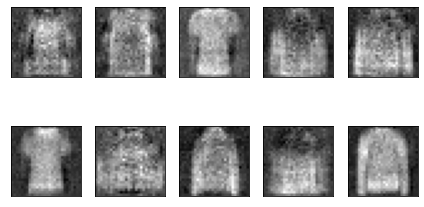

Atualmente na epoca: 70
Atualmente na epoca: 71


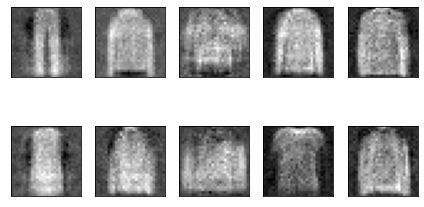

Atualmente na epoca: 72
Atualmente na epoca: 73


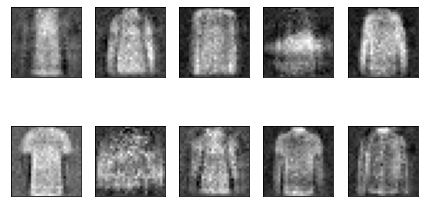

Atualmente na epoca: 74
Atualmente na epoca: 75


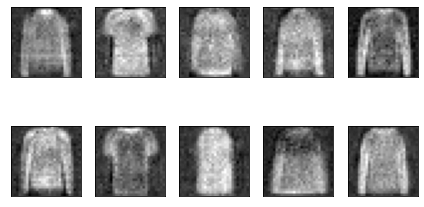

Atualmente na epoca: 76
Atualmente na epoca: 77


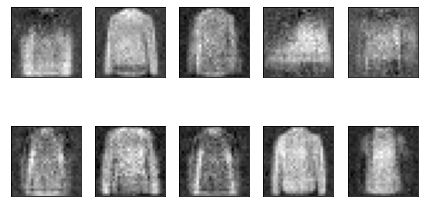

Atualmente na epoca: 78
Atualmente na epoca: 79


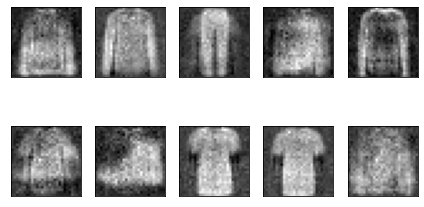

Atualmente na epoca: 80
Atualmente na epoca: 81


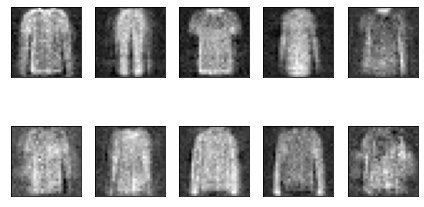

Atualmente na epoca: 82
Atualmente na epoca: 83


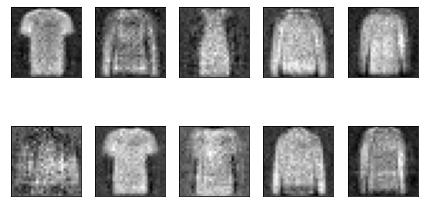

Atualmente na epoca: 84
Atualmente na epoca: 85


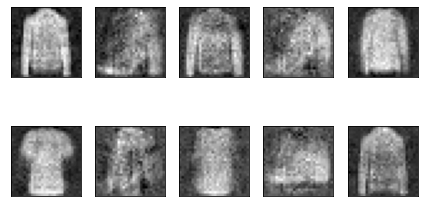

Atualmente na epoca: 86
Atualmente na epoca: 87


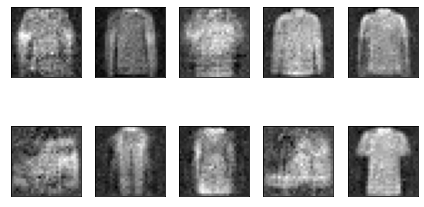

Atualmente na epoca: 88
Atualmente na epoca: 89


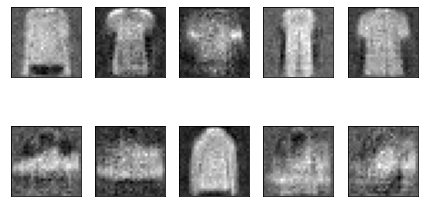

Atualmente na epoca: 90
Atualmente na epoca: 91


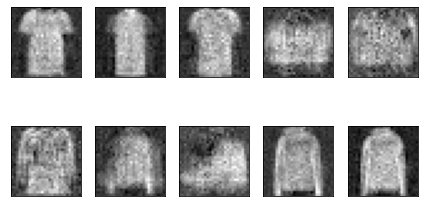

Atualmente na epoca: 92
Atualmente na epoca: 93


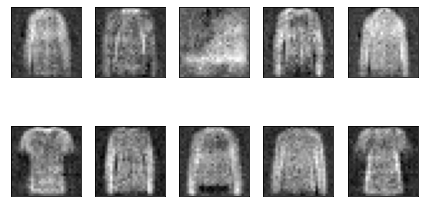

Atualmente na epoca: 94
Atualmente na epoca: 95


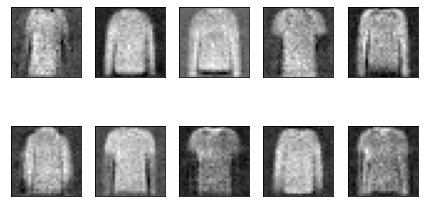

Atualmente na epoca: 96
Atualmente na epoca: 97


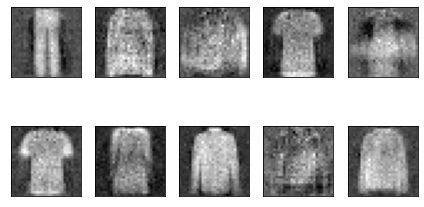

Atualmente na epoca: 98
Atualmente na epoca: 99


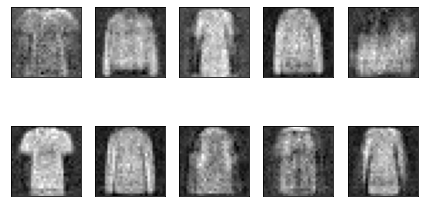

Atualmente na epoca: 100
Treinamento finalizado


In [ ]:
with tf.device(device):
    for epoch in range(epochs):
        print(f"Atualmente na epoca: {epoch+1}")
        
        
        for i in range(X_train.shape[0]//batch_size):
            
            # if (i+1) % 50 == 0:
            #     print(f"\tAtualmente no batch {i+1} de {X_train.shape[0]//batch_size}")
                
            noise = np.random.normal(size=[batch_size, noise_shape])
        
            gen_image = generator.predict_on_batch(noise)
            
            train_dataset = X_train[i*batch_size:(i+1)*batch_size]
        
            # treinando o discriminador em imagens reais
            train_label = np.ones(shape=(batch_size,1))
            discriminator.trainable = True
            d_loss_real = discriminator.train_on_batch(train_dataset, train_label)
            
            # treinando o discriminador em imagens falsas
            train_label = np.zeros(shape=(batch_size, 1))
            d_loss_fake = discriminator.train_on_batch(gen_image, train_label)
            
            
            # treinando o gerador
            noise = np.random.normal(size=[batch_size, noise_shape])
            train_label = np.ones(shape=(batch_size, 1))
            discriminator.trainable = False
            
            d_g_loss_batch = GAN.train_on_batch(noise, train_label)

        # plotando as imagens geradas no inicio e depois a cada 2 epocas
        if epoch % 2 == 0:
            samples = 10
            x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

            for k in range(samples):
                plt.subplot(2, 5, k+1)
                plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
                plt.xticks([])
                plt.yticks([])

            plt.tight_layout()
            plt.show()

print('Treinamento finalizado')

In [ ]:
noise = np.random.normal(size=[100, noise_shape])

gen_image = generator.predict(noise)

O ruído gerado usando np.random.normal é dado como entrada para o gerador. Na etapa seguinte, o gerador produz lotes de imagens semelhantes significativas a partir da distribuição aleatória.

Text(0.5, 1.0, 'Como o defeito se parece')

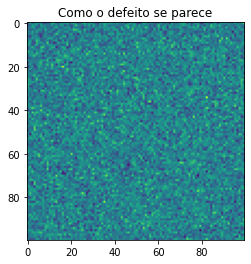

In [ ]:
plt.imshow(noise)
plt.title('Como o defeito se parece')

**Gerador produzindo imagens a partir do ruído**

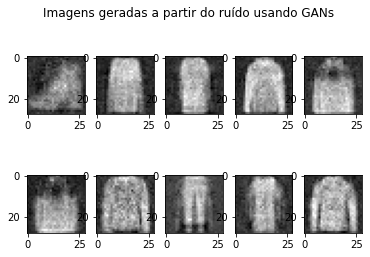

In [ ]:
fig, axe = plt.subplots(2, 5)
fig.suptitle('Imagens geradas a partir do ruído usando GANs')
idx = 0
for i in range(2):
    for j in range(5):
         axe[i,j].imshow(gen_image[idx].reshape(28, 28), cmap='gray')
         idx += 1

## Aplicando o cálculo do FID
FID da GAN simples: +/- 30

In [ ]:
# calculate fid
fid = calculate_fid(inception, X_train[:100], gen_image[:100])
print('FID: %.3f' % fid)

Scaled (100, 299, 299, 3) (100, 299, 299, 3)
FID: 34.580


**Inferência das imagens geradas**

Como discutido antes, após a iteração através de poucas dezenas de épocas, o gerador aprende a enganar o discriminador com apenas uma categoria específica de imagem de saída e, portanto, deixa de aprender além desse ponto. O ouput após o treinamento completo é assim apenas um único tipo de imagem quase similar em características, ou seja, camisas neste caso particular e não há variação nas características da imagem gerada.

A questão acima pode ser resolvida usando DCGANs, como indicado abaixo.

# **GAN com convoluções profundas (Deep Convolutions)**

Neste modelo, construímos o gerador usando camadas de convolução transpostas em vez de simples camadas densas, o que ajuda melhor na captura de características e evita o problema como descrito anteriormente. Da mesma forma, ao construir a camada discriminadora, ao invés de simples unidades densas, ele usa camadas de convolução para aumentar a eficiência de sua classificação.


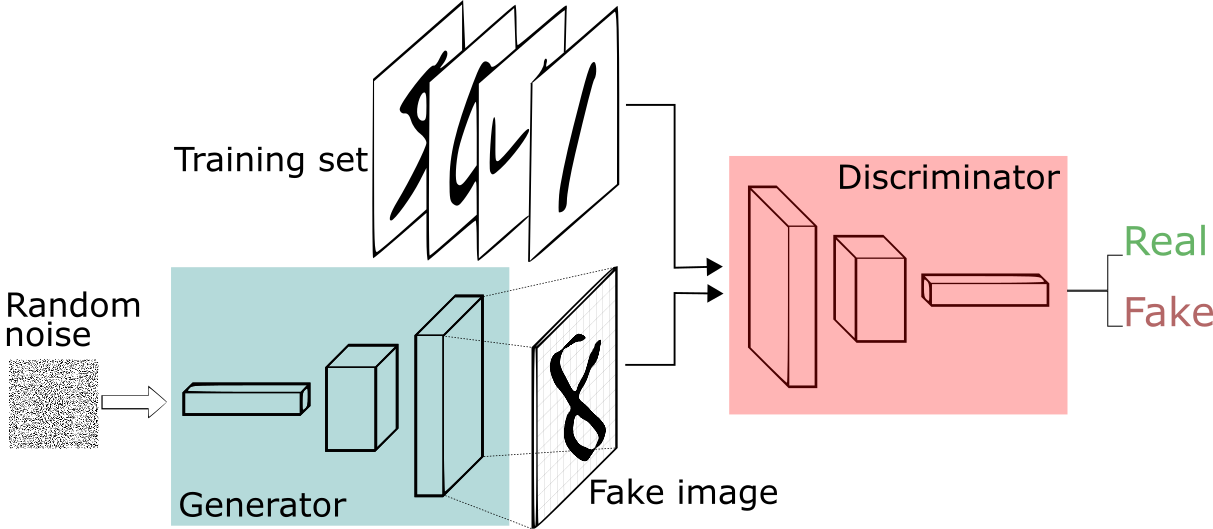


O documento que propôs esta arquitetura https://arxiv.org/abs/1511.06434

Para saber mais sobre a Conv2D https://keras.io/layers/convolutional/

## Tarefa:
- Observe os parâmetros (batch_size, quantidade de épocas, etc) e a os resultados da execução do treinamento (Não precisa executar o treinamento abaixo novamente!);
- Crie outra estrutura (camadas tipo Dense, Conv2d, etc) para o gerador e/ou o discriminador de forma que o resultado (por meio visual e do FID) dessa nova estrutura seja igual ou melhor a estrutura atual;
- Execute o treinamento abaixo assim que for testar a nova estrutura da GAN.

In [ ]:
generator = Sequential()
generator.add(Dense(7 * 7 * 128, input_shape=[100]))
generator.add(Reshape([7, 7, 128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                 activation="relu"))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
                                 activation="tanh"))

In [ ]:
generator.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 6272)              633472    
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 batch_normalization_196 (Ba  (None, 7, 7, 128)        512       
 tchNormalization)                                               
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 64)       204864    
 ranspose)                                                       
                                                                 
 batch_normalization_197 (Ba  (None, 14, 14, 64)       256       
 tchNormalization)                                               
                                                      

In [ ]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3),
                        input_shape=[28, 28, 1]))
discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))

In [ ]:
discriminator.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_190 (Conv2D)         (None, 14, 14, 64)        1664      
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_191 (Conv2D)         (None, 7, 7, 128)         204928    
                                                                 
 dropout_9 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_21 (Dense)            (None, 1)                 6273      
                                                                 
Total params: 212,865
Trainable params: 212,865
Non-t

In [ ]:
GAN = Sequential([generator, discriminator])
discriminator.compile(optimizer='adam', loss='binary_crossentropy')
discriminator.trainable = False

In [ ]:
GAN.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
GAN.layers

In [ ]:
GAN.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 28, 28, 1)         840705    
                                                                 
 sequential_10 (Sequential)  (None, 1)                 212865    
                                                                 
Total params: 1,053,570
Trainable params: 840,321
Non-trainable params: 213,249
_________________________________________________________________


In [ ]:
epochs = 150 # variam o tamanho da epoca, conforme necessario para treinar o modelo
epochs = 100
batch_size = 100
noise_shape = 100

Atualmente na epoca 1


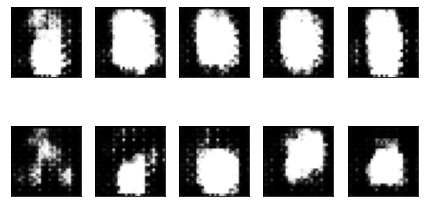

Atualmente na epoca 2
Atualmente na epoca 3


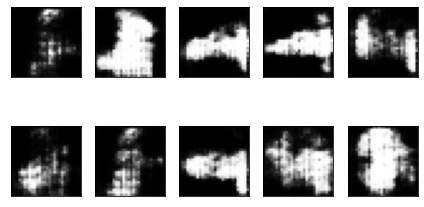

Atualmente na epoca 4
Atualmente na epoca 5


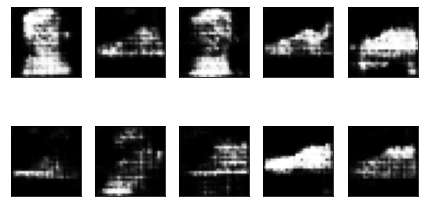

Atualmente na epoca 6
Atualmente na epoca 7


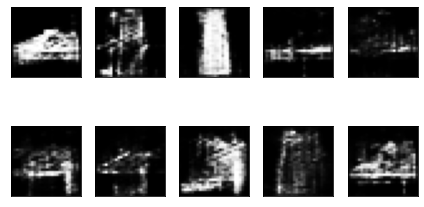

Atualmente na epoca 8
Atualmente na epoca 9


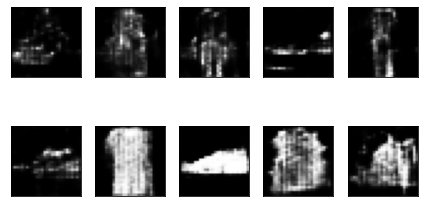

Atualmente na epoca 10
Atualmente na epoca 11


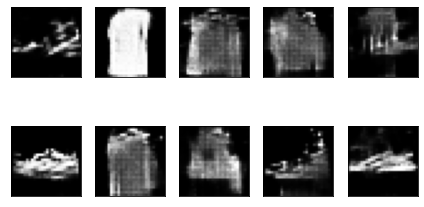

Atualmente na epoca 12
Atualmente na epoca 13


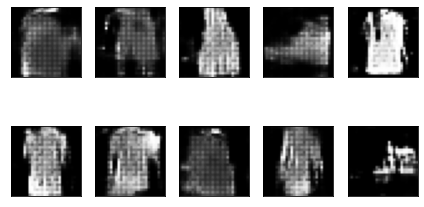

Atualmente na epoca 14
Atualmente na epoca 15


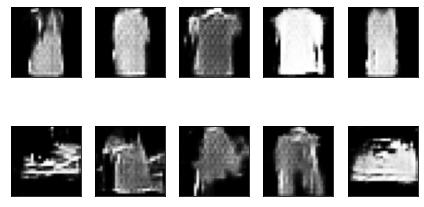

Atualmente na epoca 16
Atualmente na epoca 17


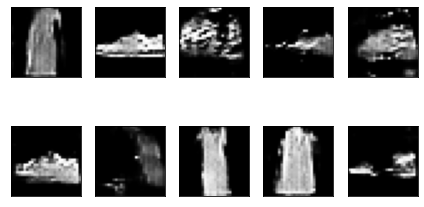

Atualmente na epoca 18
Atualmente na epoca 19


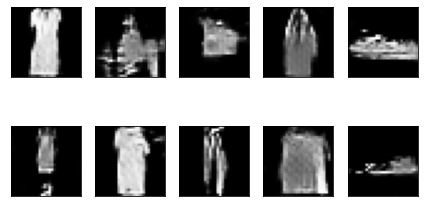

Atualmente na epoca 20
Atualmente na epoca 21


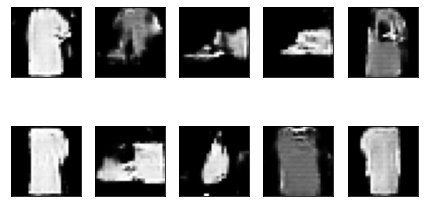

Atualmente na epoca 22
Atualmente na epoca 23


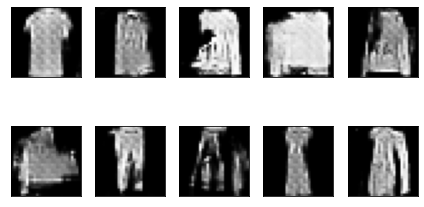

Atualmente na epoca 24
Atualmente na epoca 25


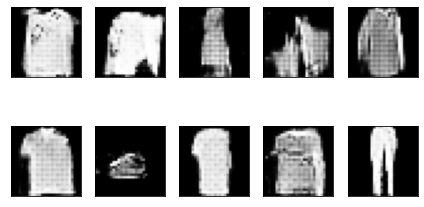

Atualmente na epoca 26
Atualmente na epoca 27


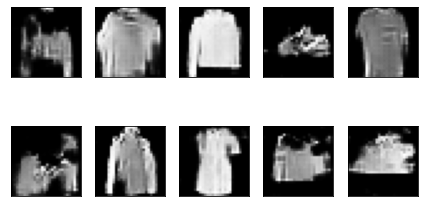

Atualmente na epoca 28
Atualmente na epoca 29


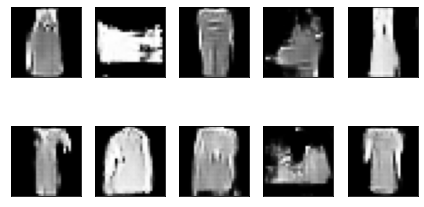

Atualmente na epoca 30
Atualmente na epoca 31


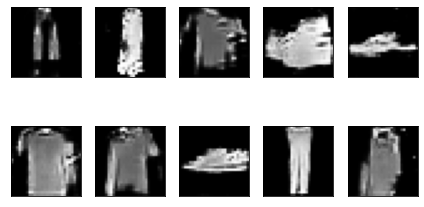

Atualmente na epoca 32
Atualmente na epoca 33


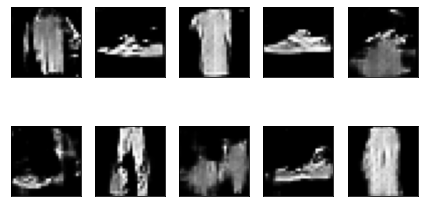

Atualmente na epoca 34
Atualmente na epoca 35


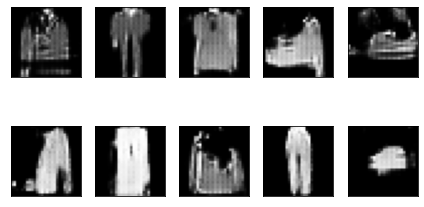

Atualmente na epoca 36
Atualmente na epoca 37


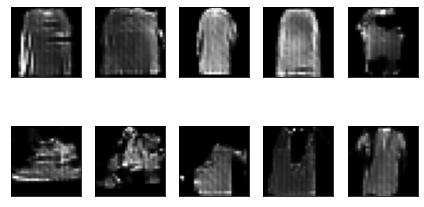

Atualmente na epoca 38
Atualmente na epoca 39


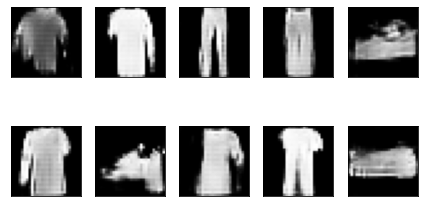

Atualmente na epoca 40
Atualmente na epoca 41


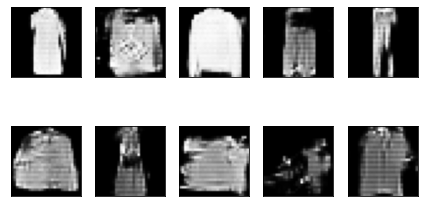

Atualmente na epoca 42
Atualmente na epoca 43


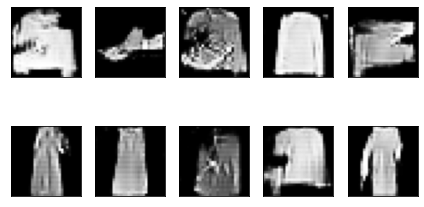

Atualmente na epoca 44
Atualmente na epoca 45


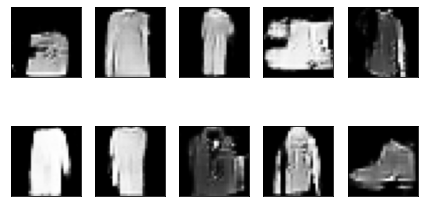

Atualmente na epoca 46
Atualmente na epoca 47


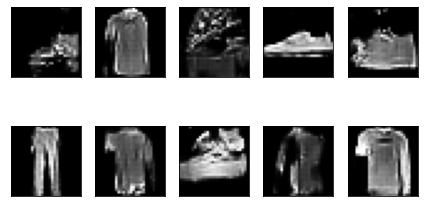

Atualmente na epoca 48
Atualmente na epoca 49


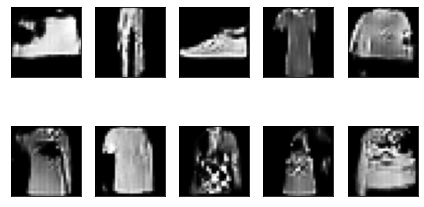

Atualmente na epoca 50
Atualmente na epoca 51


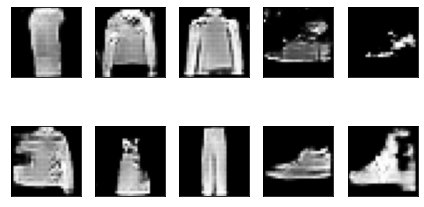

Atualmente na epoca 52
Atualmente na epoca 53


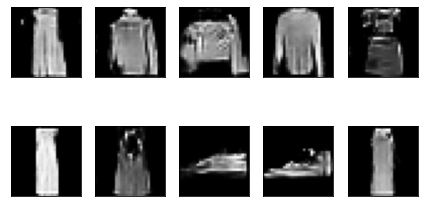

Atualmente na epoca 54
Atualmente na epoca 55


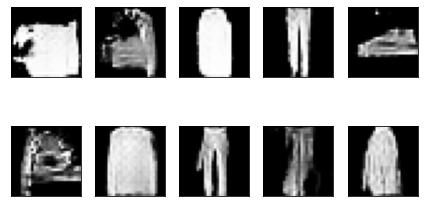

Atualmente na epoca 56
Atualmente na epoca 57


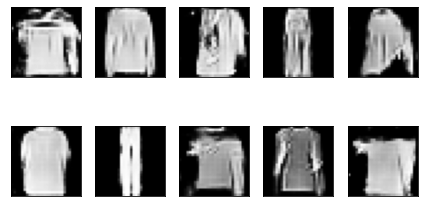

Atualmente na epoca 58
Atualmente na epoca 59


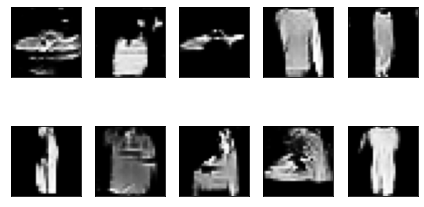

Atualmente na epoca 60
Atualmente na epoca 61


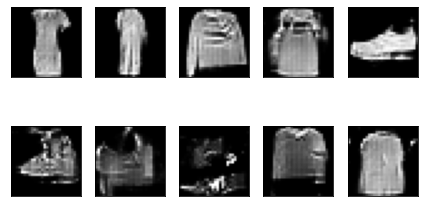

Atualmente na epoca 62
Atualmente na epoca 63


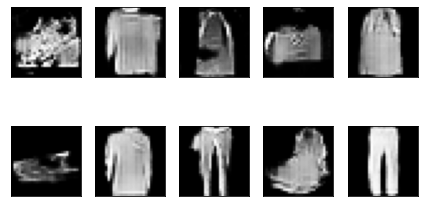

Atualmente na epoca 64
Atualmente na epoca 65


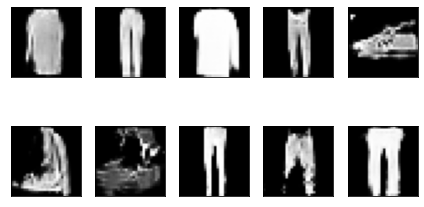

Atualmente na epoca 66
Atualmente na epoca 67


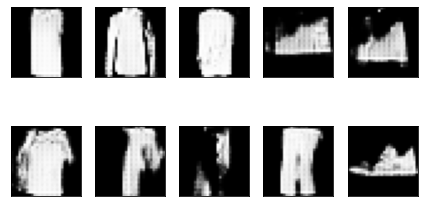

Atualmente na epoca 68
Atualmente na epoca 69


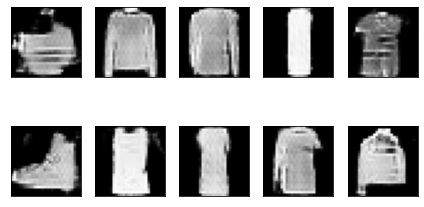

Atualmente na epoca 70
Atualmente na epoca 71


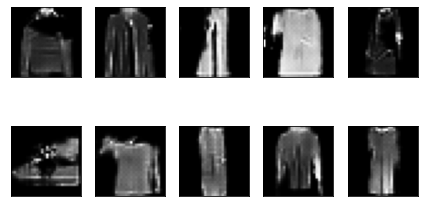

Atualmente na epoca 72
Atualmente na epoca 73


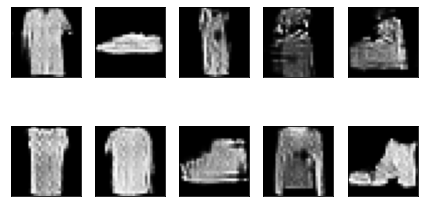

Atualmente na epoca 74
Atualmente na epoca 75


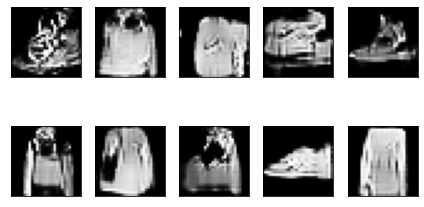

Atualmente na epoca 76
Atualmente na epoca 77


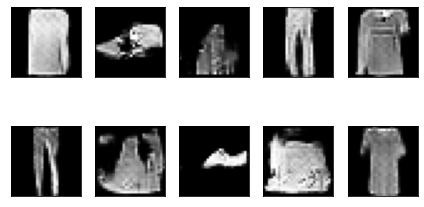

Atualmente na epoca 78
Atualmente na epoca 79


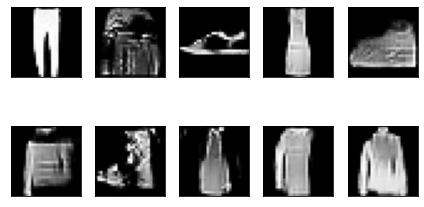

Atualmente na epoca 80
Atualmente na epoca 81


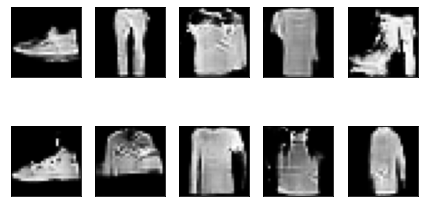

Atualmente na epoca 82
Atualmente na epoca 83


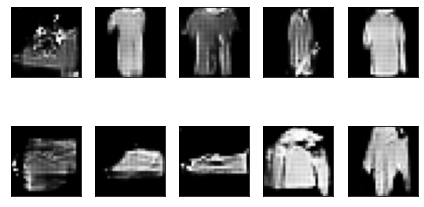

Atualmente na epoca 84
Atualmente na epoca 85


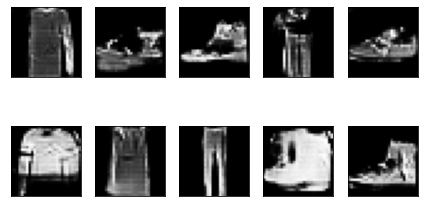

Atualmente na epoca 86
Atualmente na epoca 87


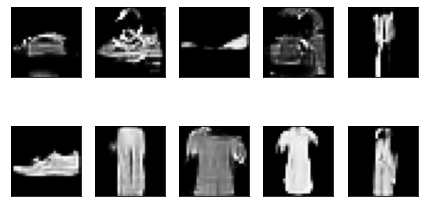

Atualmente na epoca 88
Atualmente na epoca 89


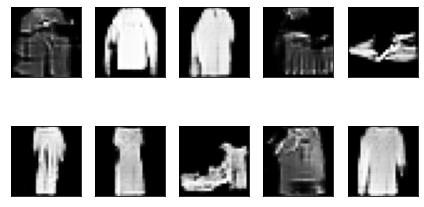

Atualmente na epoca 90
Atualmente na epoca 91


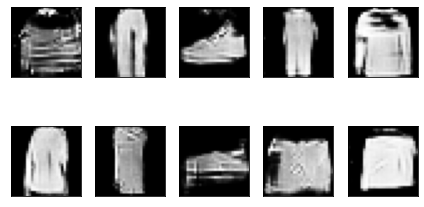

Atualmente na epoca 92
Atualmente na epoca 93


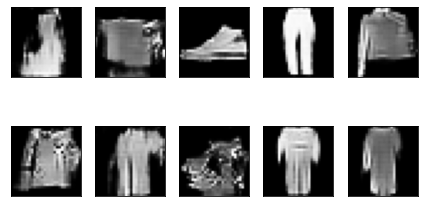

Atualmente na epoca 94
Atualmente na epoca 95


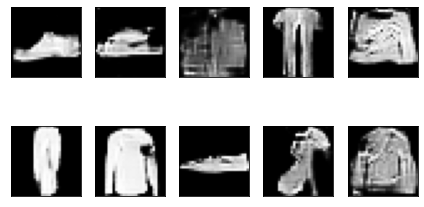

Atualmente na epoca 96
Atualmente na epoca 97


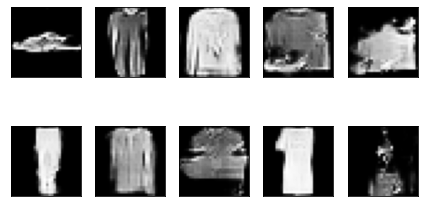

Atualmente na epoca 98
Atualmente na epoca 99


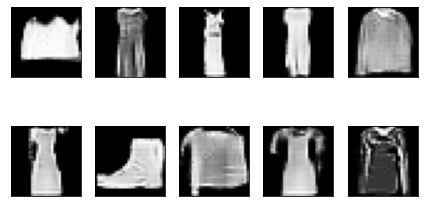

Atualmente na epoca 100
Treinamento finalizado


In [ ]:
with tf.device(device):
    for epoch in range(epochs):
        print(f"Atualmente na epoca {epoch+1}")
        
        
        for i in range(X_train.shape[0]//batch_size):
            
            # if (i+1) % 50 == 0:
            #     print(f"\tAtualmente no batch numero {i+1} de {X_train.shape[0]//batch_size}")
                
            noise = np.random.normal(size=[batch_size, noise_shape])
        
            gen_image = generator.predict_on_batch(noise)
            
            train_dataset = X_train[i*batch_size:(i+1)*batch_size]
        
            # treinando o discriminador em imagens reais
            train_label = np.ones(shape=(batch_size,1))
            discriminator.trainable = True
            d_loss_real = discriminator.train_on_batch(train_dataset, train_label)
            
            # treinando discriminador em imagens falsas
            train_label = np.zeros(shape=(batch_size,1))
            d_loss_fake = discriminator.train_on_batch(gen_image, train_label)
            
            
            # treinando o gerador
            noise = np.random.normal(size=[batch_size, noise_shape])
            train_label = np.ones(shape=(batch_size,1))
            discriminator.trainable = False # enquanto se treina o gerador como modelo combinado, o treinamento discriminador deve ser desativado
            
            d_g_loss_batch = GAN.train_on_batch(noise, train_label)
        
        # plotando as imagens geradas no inicio e depois a cada 10 epocas
        if epoch % 2 == 0:
            samples = 10
            x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

            for k in range(samples):
                plt.subplot(2, 5, k+1)
                plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
                plt.xticks([])
                plt.yticks([])

            plt.tight_layout()
            plt.show()

print('Treinamento finalizado')

In [ ]:
noise = np.random.normal(loc=0, scale=1, size=(100, noise_shape))

gen_image = generator.predict(noise)

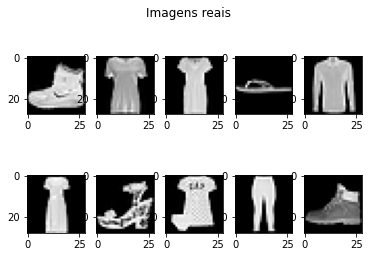

In [ ]:
fig, axe = plt.subplots(2,5)
fig.suptitle("Imagens reais")
idx = 0
for i in range(2):
    for j in range(5):
        axe[i,j].imshow(X_train[idx].reshape(28,28), cmap='gray')
        idx += 10

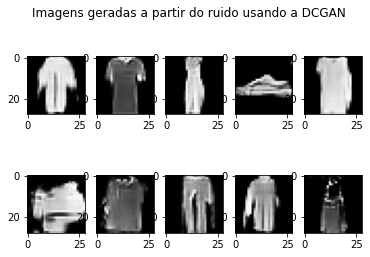

In [ ]:
fig, axe = plt.subplots(2,5)
fig.suptitle('Imagens geradas a partir do ruido usando a DCGAN')
idx = 0
for i in range(2):
     for j in range(5):
         axe[i,j].imshow(gen_image[idx].reshape(28,28), cmap='gray')
         idx += 3

## Aplicando o cálculo do FID
FID da Deep GAN: +/- 10

In [ ]:
# calculate fid
fid = calculate_fid(inception, X_train[:100], gen_image[:100])
print('FID: %.3f' % fid)

Scaled (100, 299, 299, 3) (100, 299, 299, 3)
FID: 10.298


In [ ]:
# from google.colab.patches import cv2_imshow
# images1 = X_train[0] * 255# .astype('float32')
# images2 = gen_image[0] * 255# .astype('float32')
# cv2_imshow(images1)
# cv2_imshow(images2)
# # resize images
# images1 = scale_images([images1], (299,299,3))
# images2 = scale_images([images2], (299,299,3))
# print('Scaled', images1.shape, images2.shape)
# cv2_imshow(images1[0])
# cv2_imshow(images2[0])

# **Inferência**

A introdução de GAN de convolução profunda ajuda a melhorar a variação dos dados de saída e evita que o modelo fique preso em um único tipo de imagem. O fato interessante aqui parece que o gerador é capaz de criar imagens significativas a partir de entradas de ruído sem mesmo ver as imagens reais e é isso que torna o GANS tão interessante.

# **Referências**

1. https://arxiv.org/abs/1406.2661 - GANs paper in 2014 by Ian J. Goodfellow and others.
2. https://arxiv.org/abs/1511.06434 - DCGANs in 2016
3. https://arxiv.org/pdf/1611.02163.pdf - 2017 ICLR paper 
4. https://towardsdatascience.com/understanding-generative-adversarial-networks-gans-cd6e4651a29